In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cars = pd.read_csv('used_Updated.csv')

In [4]:
cars.drop(cars[cars['Godiste']<2000].index,inplace=True)

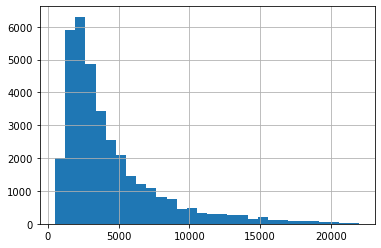

In [5]:
cars['Cena'].hist(bins=30)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35894 entries, 0 to 37517
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brend        35894 non-null  object
 1   Cena         35894 non-null  int64 
 2   Godiste      35894 non-null  int64 
 3   Gorivo       35894 non-null  object
 4   Karoserija   35894 non-null  object
 5   Kilometraza  35894 non-null  int64 
 6   Kubikaza     35894 non-null  int64 
 7   Model        35894 non-null  object
 8   Snaga        35894 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


In [7]:
cars

,Brend,Cena,Godiste,Gorivo,Karoserija,Kilometraza,Kubikaza,Model,Snaga
0,ALFA ROMEO,2150,2007,Dizel,Hecbek,215000,1910,147,120
1,ALFA ROMEO,2850,2006,Dizel,Hecbek,222000,1910,147,150
2,ALFA ROMEO,1850,2004,Dizel,Limuzina,178000,1910,147,116
3,ALFA ROMEO,1700,2004,Dizel,Hecbek,156906,1910,147,116
4,ALFA ROMEO,1700,2002,Dizel,Hecbek,272000,1900,147,116
...,...,...,...,...,...,...,...,...,...
37513,VOLKSWAGEN,4200,2006,Dizel,Monovolumen (MiniVan),251000,1900,TOURAN,105
37514,VOLKSWAGEN,3550,2005,Dizel,Monovolumen (MiniVan),259000,1896,TOURAN,105
37515,VOLKSWAGEN,7700,2011,Dizel,Monovolumen (MiniVan),214000,1598,TOURAN,105
37516,VOLKSWAGEN,4490,2007,Dizel,Monovolumen (MiniVan),210000,1890,TOURAN,105


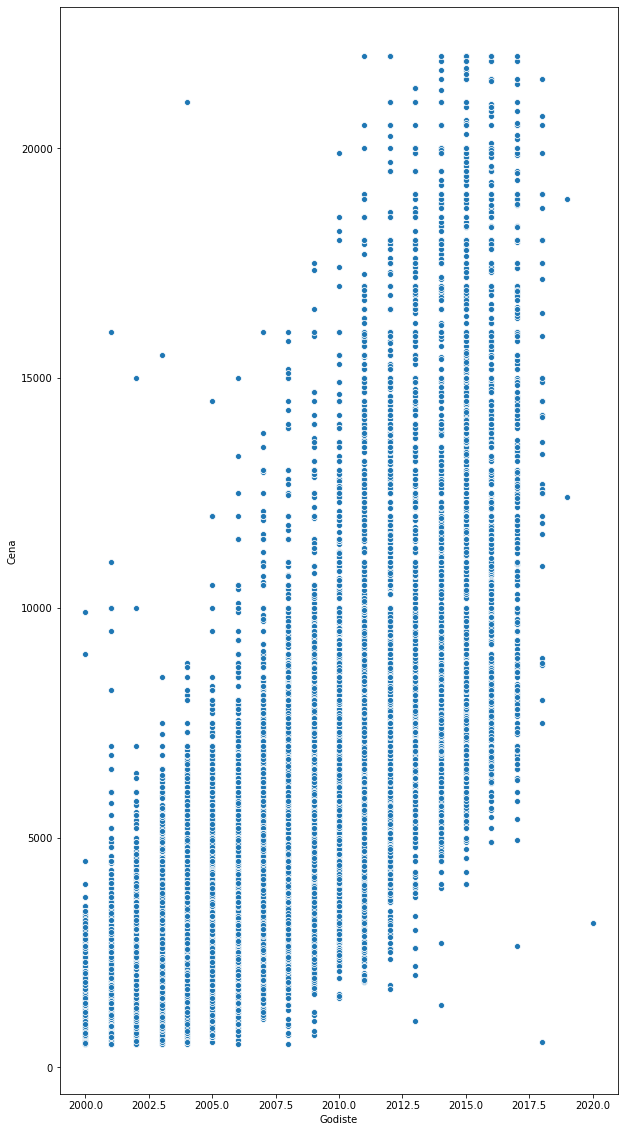

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [11]:
for i in range(7):
    for year in range(2000,2021):
        max = cars[cars['Godiste']==year]['Cena'].max()
        min = cars[cars['Godiste']==year]['Cena'].min()
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==max)].index, inplace=True)
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==min)].index, inplace=True)

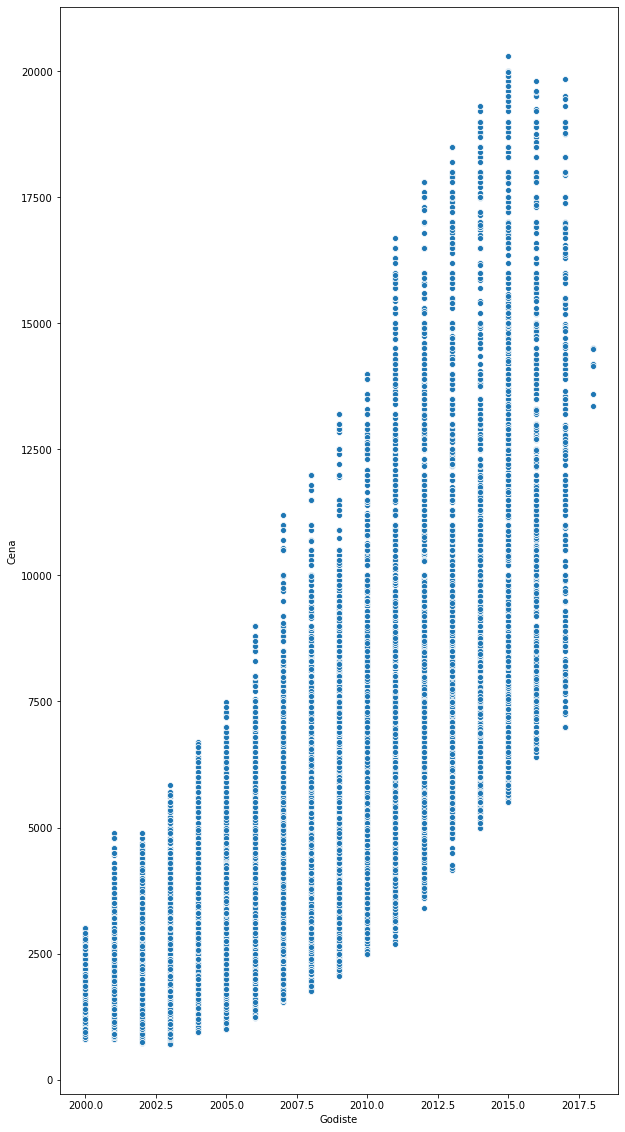

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [13]:
years = cars.groupby('Godiste')

In [14]:
years['Cena'].std()

Godiste
2000     493.169836
2001     658.406891
2002     713.476204
2003     838.029927
2004    1030.568775
2005    1243.796113
2006    1324.123565
2007    1530.831139
2008    1964.762033
2009    2171.260154
2010    2402.974281
2011    3070.902287
2012    3376.025368
2013    3473.452683
2014    3753.515152
2015    3782.009934
2016    3492.706137
2017    3360.004095
2018     431.349357
Name: Cena, dtype: float64

In [15]:
years['Cena'].mean()

Godiste
2000     1612.517832
2001     1776.641629
2002     1883.731585
2003     2139.184117
2004     2580.910426
2005     3164.413627
2006     3558.997614
2007     3990.142177
2008     4771.396241
2009     5488.529380
2010     6220.826667
2011     7505.446389
2012     8503.496262
2013     9699.288512
2014    10201.725784
2015    11077.295846
2016    11523.754685
2017    12412.567164
2018    14123.625000
Name: Cena, dtype: float64

In [16]:
cars['Karoserija'].unique()

array(['Hecbek ', 'Limuzina ', 'Kupe ', 'Karavan ', 'Kabriolet/Roadster ',
       'Dzip/SUV ', 'Monovolumen (MiniVan) ', 'Pickup '], dtype=object)

We can drop pickup cars since there are few of that type in our dataset

In [18]:
cars.drop(cars[cars['Karoserija']=='Pickup '].index, inplace=True)

In [27]:
cars['Karoserija'].value_counts()

Hecbek                    12805
Karavan                    8299
Limuzina                   6589
Monovolumen (MiniVan)      3300
Dzip/SUV                   2771
Kupe                        617
Kabriolet/Roadster          352
Name: Karoserija, dtype: int64

In [43]:
cars[(cars['Godiste']==2014) & (cars['Karoserija']=='Hecbek ')].sort_values(by='Kilometraza', ascending=False).head(15)

,Brend,Cena,Godiste,Gorivo,Karoserija,Kilometraza,Kubikaza,Model,Snaga
37360,VOLKSWAGEN,6499,2014,Dizel,Hecbek,299648,1900,TOURAN,107
32668,VOLKSWAGEN,12600,2014,Dizel,Hecbek,275000,1968,GOLF 7,150
25201,RENAULT,5100,2014,Dizel,Hecbek,257000,1461,MEGANE,109
32434,VOLKSWAGEN,9999,2014,Dizel,Hecbek,231242,1590,GOLF 7,105
21728,PEUGEOT,8099,2014,Dizel,Hecbek,230000,1560,308,116
5642,CITROEN,5450,2014,Dizel,Hecbek,222267,1397,C3,68
22829,RENAULT,5490,2014,Dizel,Hecbek,222000,1461,CLIO,75
22683,PEUGEOT,7950,2014,Dizel,Hecbek,220000,1560,3008,116
21610,PEUGEOT,7300,2014,Dizel,Hecbek,220000,1600,308,92
32640,VOLKSWAGEN,13900,2014,Dizel,Hecbek,217000,1968,GOLF 7,184


We can filter out highest 10% of mileage because they represent outliers

In [33]:
cars[(cars['Godiste']==2014) & (cars['Karoserija']=='Hecbek ')]['Kilometraza'].quantile(0.90)

198400.0

In [73]:
df = cars[(cars['Godiste']==2014) & (cars['Karoserija']=='Hecbek ')][['Godiste','Model']]

df['Model'] = df['Model'].apply(lambda x: x+'_'+df['Godiste'].astype(str))
models = df['Model'].unique()
print(models)

['118_2014' '120_2014' 'C3_2014' 'C4_2014' 'BRAVO_2014'
 'GRANDE PUNTO_2014' 'C MAX_2014' 'FIESTA_2014' 'FOCUS_2014' 'MONDEO_2014'
 'CIVIC_2014' '3_2014' 'B 180_2014' 'QASHQAI + 2_2014' 'ASTRA J_2014'
 'CORSA D_2014' 'INSIGNIA_2014' '308_2014' '3008_2014' 'CLIO_2014'
 'GRAND SCENIC_2014' 'MEGANE_2014' 'TWINGO_2014' 'IBIZA_2014' 'LEON_2014'
 'PRIUS +_2014' 'YARIS_2014' 'GOLF 7_2014' 'POLO_2014' 'TOURAN_2014']


So, everything above 198400km will not be taken into account when getting models that are within 

In [77]:
import random
percent=1.4
user_cars = []
types = [['Hecbek ', 'Limuzina ', 'Karavan '],['Dzip/SUV ', 'Monovolumen (MiniVan) ', 'Karavan '],
         ['Kabriolet/Roadster ', 'Kupe '], ['Limuzina ',  'Karavan ']]

for t in types:
    for year in range(1998,2019): 
        min = cars[(cars['Godiste']<=year+1) & (cars['Godiste']>year-1)]['Cena'].min()
        max = cars[(cars['Godiste']<=year+1) & (cars['Godiste']>year-1)]['Cena'].max()
        mean = cars[(cars['Godiste']<=year+1) & (cars['Godiste']>year-1)]['Cena'].mean()
        mileage = cars[(cars['Godiste']==year) & cars['Karoserija'].isin(t)]['Kilometraza'].quantile(0.9)
        try:
            step = round(mean*percent - mean)
            for price in range(min,max,step):
                df = cars[(cars['Cena']>price) & (cars['Cena']<price+step) & (cars['Godiste']<=year+1) & (cars['Godiste']>=year-1) & (cars['Karoserija'].isin(t))][['Model','Godiste']]
                df['Model'] = df['Model'].apply(lambda x: x+'_'+df['Godiste'].astype(str))
                models = df['Model'].unique()
                if models.size > 0:
                    #print("Similar car models in price range between {} and {} in year {}".format(price,price+step,year))
                    models = list(models)
                    if len(models)>3:
                        users_count = random.randint(6,15)
                        for user in range(users_count):
                                car_count = random.randint(2,6)
                                if car_count>len(models):
                                    car_list=[k for k in random.sample(models,len(models))]
                                    user_cars.append(car_list)
                                else:
                                    car_list=[k for k in random.sample(models,car_count)]
                                    user_cars.append(car_list)
                    elif len(models)>=2:
                        car_list = [k) for k in models]
                        user_cars.append(car_list)
                    else:
                        pass

            percent = percent-0.015
        except ValueError:
            pass
print(user_cars)
print(len(user_cars))    

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-77-f70289741693>, line 33)

In [67]:
users = pd.DataFrame(user_cars,columns=['car1','car2','car3','car4','car5','car6'])
users

,car1,car2,car3,car4,car5,car6
0,GOLF 4_1999,156_2000,WAGON R+_1999,CIVIC_2001,FIESTA_1999,530_2000
1,XSARA_2001,VECTRA B_2000,QASHQAI + 2_2000,PRIUS +_2001,None,None
2,ASTRA G_2001,PASSAT B5_2000,BORA_2000,FOCUS_1999,PRIUS +_1999,None
3,XSARA_2001,LAGUNA_2001,TWINGO_1999,CIVIC_2001,None,None
4,CORSA C_1999,MEGANE_2001,406_1999,FOCUS_1999,ASTRA F_2000,None
...,...,...,...,...,...,...
4369,TOUAREG_2006,PRIUS +_2007,X5_2006,None,None,None
4370,X5_2006,PRIUS +_2006,None,None,None,None
4371,ML KLASA_2008,TOUAREG_2006,None,None,None,None
4372,X5_2007,TOUAREG_2008,ML KLASA_2006,PRIUS +_2007,None,None


In [79]:
users = users.fillna('')

In [69]:
users['combined']= users.values.tolist()
users

,car1,car2,car3,car4,car5,car6,combined
0,GOLF 4_1999,156_2000,WAGON R+_1999,CIVIC_2001,FIESTA_1999,530_2000,"[GOLF 4_1999, 156_2000, WAGON R+_1999, CIVIC_2..."
1,XSARA_2001,VECTRA B_2000,QASHQAI + 2_2000,PRIUS +_2001,None,None,"[XSARA_2001, VECTRA B_2000, QASHQAI + 2_2000, ..."
2,ASTRA G_2001,PASSAT B5_2000,BORA_2000,FOCUS_1999,PRIUS +_1999,None,"[ASTRA G_2001, PASSAT B5_2000, BORA_2000, FOCU..."
3,XSARA_2001,LAGUNA_2001,TWINGO_1999,CIVIC_2001,None,None,"[XSARA_2001, LAGUNA_2001, TWINGO_1999, CIVIC_2..."
4,CORSA C_1999,MEGANE_2001,406_1999,FOCUS_1999,ASTRA F_2000,None,"[CORSA C_1999, MEGANE_2001, 406_1999, FOCUS_19..."
...,...,...,...,...,...,...,...
4369,TOUAREG_2006,PRIUS +_2007,X5_2006,None,None,None,"[TOUAREG_2006, PRIUS +_2007, X5_2006, None, No..."
4370,X5_2006,PRIUS +_2006,None,None,None,None,"[X5_2006, PRIUS +_2006, None, None, None, None]"
4371,ML KLASA_2008,TOUAREG_2006,None,None,None,None,"[ML KLASA_2008, TOUAREG_2006, None, None, None..."
4372,X5_2007,TOUAREG_2008,ML KLASA_2006,PRIUS +_2007,None,None,"[X5_2007, TOUAREG_2008, ML KLASA_2006, PRIUS +..."


In [70]:
users.drop(columns=['car1','car2','car3','car4','car5','car6'], inplace=True)

In [83]:
users = users.explode('combined')
users['user_id'] = users.index
users['carId'] = users['combined']
users['carId'].replace('', np.nan, inplace=True)
users.dropna(inplace=True)

users

,combined,user_id,carId
0,GOLF 4_1999,0,GOLF 4_1999
0,156_2000,0,156_2000
0,WAGON R+_1999,0,WAGON R+_1999
0,CIVIC_2001,0,CIVIC_2001
0,FIESTA_1999,0,FIESTA_1999
...,...,...,...
4372,TOUAREG_2008,4372,TOUAREG_2008
4372,ML KLASA_2006,4372,ML KLASA_2006
4372,PRIUS +_2007,4372,PRIUS +_2007
4373,X5_2006,4373,X5_2006


In [86]:
users.drop(columns='combined', inplace=True)

In [88]:
users.to_csv('users.csv', index=False)

In [73]:
cars['car_id'] = cars['Model'] + '_' + cars['Godiste'].astype(str)

In [74]:
cars.drop_duplicates()

,Brend,Cena,Godiste,Gorivo,Karoserija,Kilometraza,Kubikaza,Model,Snaga,car_id
0,ALFA ROMEO,2150,2007,Dizel,Hecbek,215000,1910,147,120,147_2007
1,ALFA ROMEO,2850,2006,Dizel,Hecbek,222000,1910,147,150,147_2006
2,ALFA ROMEO,1850,2004,Dizel,Limuzina,178000,1910,147,116,147_2004
3,ALFA ROMEO,1700,2004,Dizel,Hecbek,156906,1910,147,116,147_2004
4,ALFA ROMEO,1700,2002,Dizel,Hecbek,272000,1900,147,116,147_2002
...,...,...,...,...,...,...,...,...,...,...
37513,VOLKSWAGEN,4200,2006,Dizel,Monovolumen (MiniVan),251000,1900,TOURAN,105,TOURAN_2006
37514,VOLKSWAGEN,3550,2005,Dizel,Monovolumen (MiniVan),259000,1896,TOURAN,105,TOURAN_2005
37515,VOLKSWAGEN,7700,2011,Dizel,Monovolumen (MiniVan),214000,1598,TOURAN,105,TOURAN_2011
37516,VOLKSWAGEN,4490,2007,Dizel,Monovolumen (MiniVan),210000,1890,TOURAN,105,TOURAN_2007


In [75]:
cars.to_csv('CarIds.csv')